In [23]:
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image

class TreasureHuntEnv:
    def __init__(self):
        self.action_space = ['Up', 'Down', 'Left', 'Right']
        self.state_space = [(x, y) for x in range(5) for y in range(5)]
        self.rewards = {
            (1, 1): 1,
            (2, 3): 1,
            (3, 1): -1,
            (4, 4): 50
        }
        self.current_state = (0, 0)

        #images for visualization
        self.images = {
            "agent_idle": Image.open("assets/agent_idle.png").resize((60, 100)),
            "agent_move": Image.open("assets/agent_move.png").resize((60, 100)), 
            "treasure": Image.open("assets/treasure1.png").resize((80, 80)),
            "trap": Image.open("assets/trap1.png").resize((80, 80)),
            "goal": Image.open("assets/goal.png").resize((80, 80)),
            "background": Image.open("assets/background.png").resize((600, 600)) 
        }

    def step(self, action):
        x, y = self.current_state
        if action == 'Up':
            x = max(0, x - 1)
        elif action == 'Down':
            x = min(4, x + 1)
        elif action == 'Left':
            y = max(0, y - 1)
        elif action == 'Right':
            y = min(4, y + 1)

        self.current_state = (x, y)
        reward = self.rewards.get(self.current_state, 0)-1
        done = self.current_state == (4, 4)
        return self.current_state, reward, done

    def reset(self):
        self.current_state = (0, 0)
        return self.current_state
    
    def render(self, action=None):
        fig, ax = plt.subplots(figsize=(8, 8))  
        ax.imshow(self.images["background"], extent=[0, 5, 0, 5])

        x, y = self.current_state

        for i in range(5):
            for j in range(5):
                if (i, j) == (4, 4):
                    ax.imshow(self.images["goal"], extent=[j, j+1, 4-i, 5-i])
                elif (i, j) in self.rewards:
                    if self.rewards[(i, j)] > 0:
                        ax.imshow(self.images["treasure"], extent=[j, j+1, 4-i, 5-i])
                    elif self.rewards[(i, j)] < 0:
                        ax.imshow(self.images["trap"], extent=[j, j+1, 4-i, 5-i])

        agent_img = self.images["agent_idle"] if action is None else self.images["agent_move"]
        ax.imshow(agent_img, extent=[y, y+1, 4-x, 5-x], aspect="auto")  # Stretch taller

        for i in range(6):
            ax.axhline(i, color='black', linewidth=0.5)
            ax.axvline(i, color='black', linewidth=0.5)

        ax.set_xlim(0, 5)
        ax.set_ylim(0, 5)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Treasure Hunt Environment")
        plt.show()


In [24]:
class SARSAAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.99,min_epsilon=0.01):
        self.env = env
        self.alpha = alpha 
        self.gamma = gamma 
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.Q = {state: {action: 0 for action in env.action_space} for state in env.state_space}
        
    def epsilon_greedy_policy(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.env.action_space)
        else:
            return max(self.Q[state], key=self.Q[state].get)

    def train(self, episodes):
        rewards_per_episode = []
        epsilon_values = []

        for episode in range(episodes):
            state = self.env.reset()
            action = self.epsilon_greedy_policy(state)
            total_reward = 0

            while True:
                next_state, reward, done = self.env.step(action)
                next_action = self.epsilon_greedy_policy(next_state)

                self.Q[state][action] += self.alpha * (
                    reward + self.gamma * self.Q[next_state][next_action] - self.Q[state][action]
                )

                total_reward += reward
                state, action = next_state, next_action

                if done:
                    break

            rewards_per_episode.append(total_reward)
            epsilon_values.append(self.epsilon)
            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

        return rewards_per_episode, epsilon_values

    def evaluate(self, episodes, max_steps=100):
        print('Start evaluation')
        rewards = []
        comments = []

        for episode in range(episodes):
            state = self.env.reset()
            total_reward = 0
            success = False
            steps = 0

            while steps < max_steps:
                steps += 1
                action = max(self.Q[state], key=self.Q[state].get)
                next_state, reward, done = self.env.step(action)
                total_reward += reward
                state = next_state

                if done:
                    success = True
                    break

                if episode == episodes - 1:
                    self.env.render()

            rewards.append(total_reward)
            if success:
                comments.append(f"Episode {episode + 1}: SUCCESS - Goal reached in {steps} steps with total reward {total_reward}.")
            else:
                comments.append(f"Episode {episode + 1}: FAIL - Goal not reached in {steps} steps (max steps reached).")

        return rewards, comments


env = TreasureHuntEnv()
agent = SARSAAgent(env, alpha=0.8, gamma=0.7, epsilon=1, epsilon_decay=0.99,min_epsilon=0.2)

episodes = 1000
rewards_per_episode, epsilon_values = agent.train(episodes)

Start evaluation


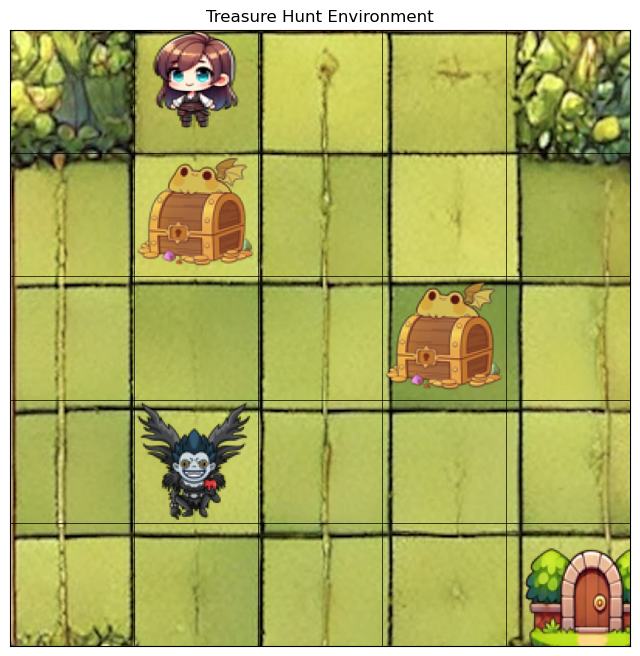

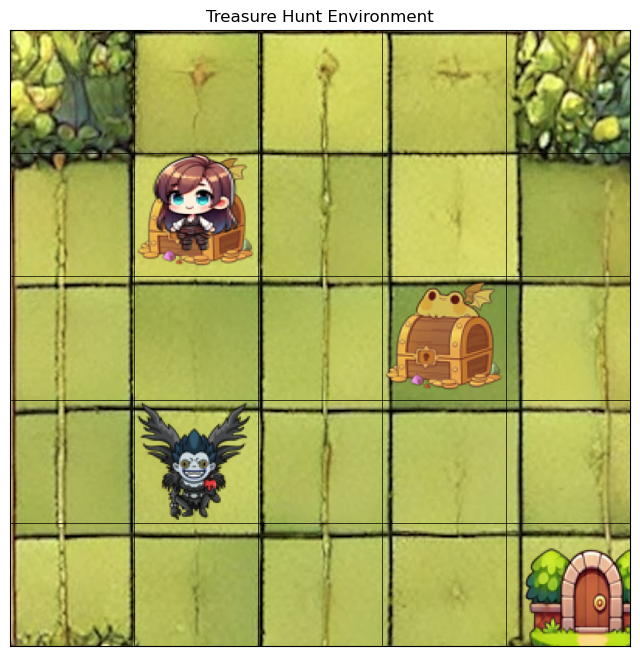

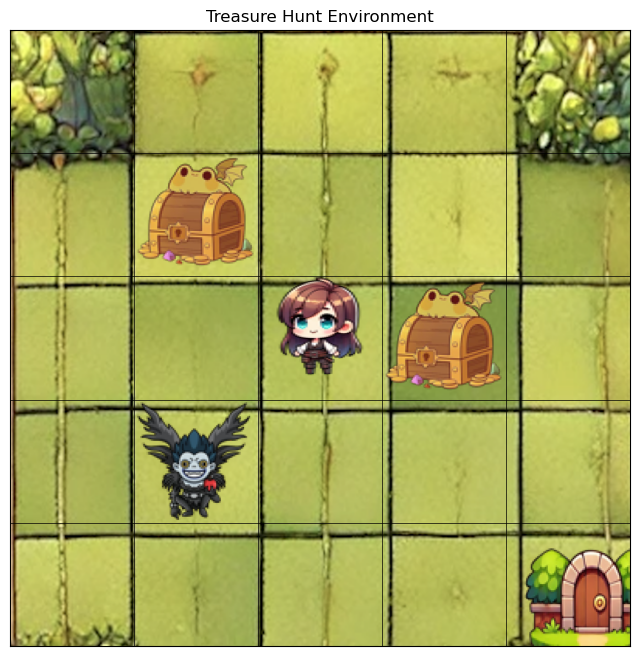

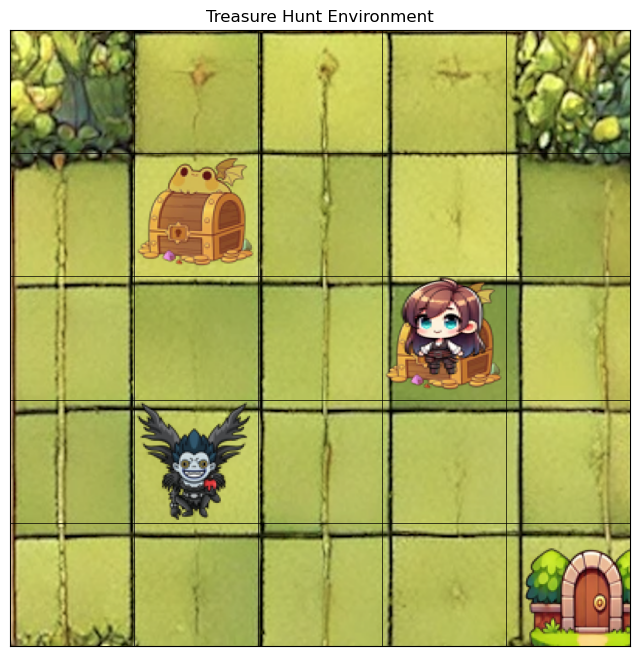

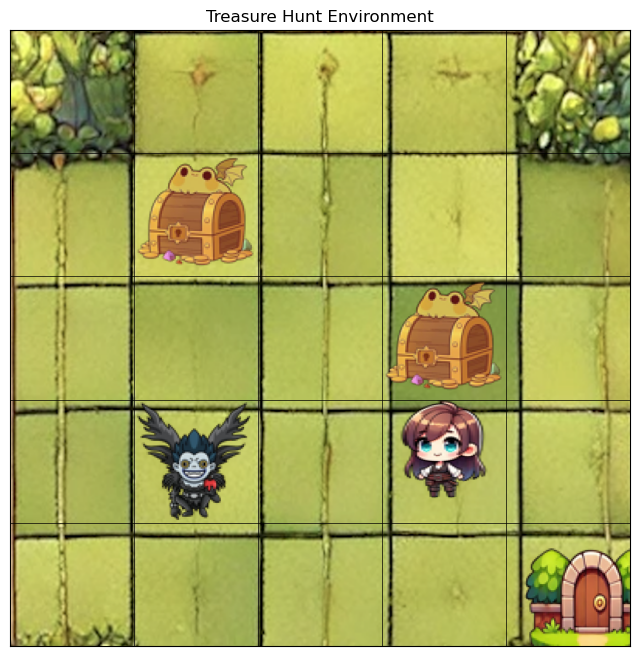

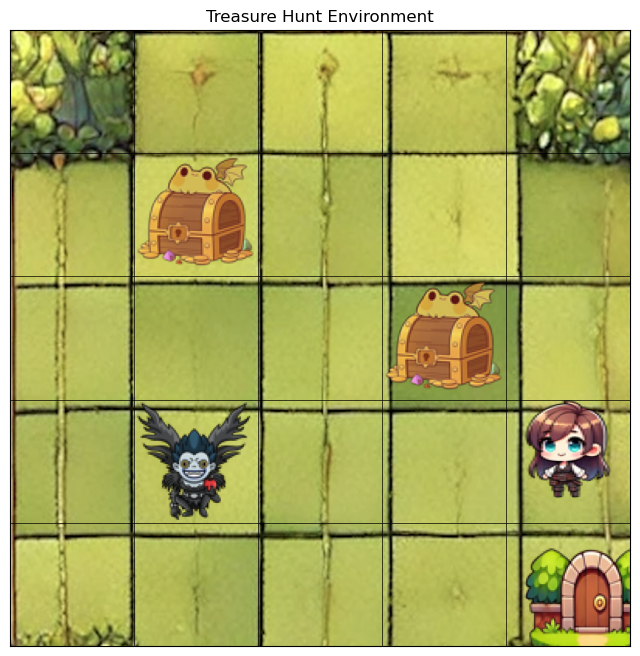

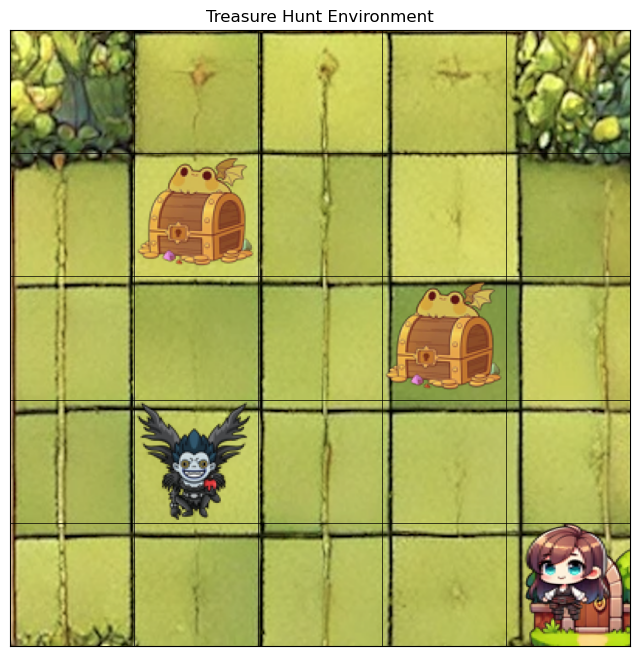

In [25]:
evaluation_episodes = 50
evaluation_rewards, evaluation_comments = agent.evaluate(evaluation_episodes)
env.render()

In [26]:
evaluation_comments

['Episode 1: SUCCESS - Goal reached in 8 steps with total reward 44.',
 'Episode 2: SUCCESS - Goal reached in 8 steps with total reward 44.',
 'Episode 3: SUCCESS - Goal reached in 8 steps with total reward 44.',
 'Episode 4: SUCCESS - Goal reached in 8 steps with total reward 44.',
 'Episode 5: SUCCESS - Goal reached in 8 steps with total reward 44.',
 'Episode 6: SUCCESS - Goal reached in 8 steps with total reward 44.',
 'Episode 7: SUCCESS - Goal reached in 8 steps with total reward 44.',
 'Episode 8: SUCCESS - Goal reached in 8 steps with total reward 44.',
 'Episode 9: SUCCESS - Goal reached in 8 steps with total reward 44.',
 'Episode 10: SUCCESS - Goal reached in 8 steps with total reward 44.',
 'Episode 11: SUCCESS - Goal reached in 8 steps with total reward 44.',
 'Episode 12: SUCCESS - Goal reached in 8 steps with total reward 44.',
 'Episode 13: SUCCESS - Goal reached in 8 steps with total reward 44.',
 'Episode 14: SUCCESS - Goal reached in 8 steps with total reward 44.',
 